# NB - Tiktok

In [2]:
import sys
import os
import pandas as pd

# Agregar el directorio raiz al PYTHONPATH
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

Importar modelo NB y cargar datos

In [3]:
from src.trainers.train_nb import train_nb
from src.trainers.utils import build_datasets, save_metrics
from constants.constants_tiktok import TIKTOK_DATASET_SENTENCES, TIKTOK_NB_METRICS_PATH

dataset_train, dataset_test, dataset_val = build_datasets(
    TIKTOK_DATASET_SENTENCES,
    test_size=0.3,
    val_size=0.5, # 0.5 de 0.3    
    random_state=42
)
print(dataset_train.shape)
print(dataset_test.shape)
print(dataset_val.shape)

(13727, 2)
(2942, 2)
(2942, 2)


## Hiperparámetros

In [5]:
import numpy as np

list_vectorizers = ["tfidf", "bow"]
list_alpha = np.logspace(-4, -1, 20)
print(list_alpha)

[0.0001     0.00014384 0.00020691 0.00029764 0.00042813 0.00061585
 0.00088587 0.00127427 0.00183298 0.00263665 0.00379269 0.00545559
 0.0078476  0.01128838 0.01623777 0.02335721 0.03359818 0.0483293
 0.06951928 0.1       ]


## Entrenar modelos

In [6]:
from constants.constants_tiktok import NB_PIPELINE_PATH
from src.trainers.utils import save_model

best_accuracy = -1
for vectorizer in list_vectorizers:
    for alpha in list_alpha:
        pipeline, metrics = train_nb(
            dataset_train,
            dataset_val,
            alpha=alpha,
            vec=vectorizer
        )
        print(f"NB {vectorizer} {alpha}: {metrics['accuracy']}")
        save_metrics(metrics, TIKTOK_NB_METRICS_PATH)
        if metrics['accuracy'] > best_accuracy:
            best_accuracy = metrics['accuracy']
            save_model(pipeline, NB_PIPELINE_PATH)

NB tfidf 0.0001: 0.6176070700203943
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\nb_pipeline.pkl
NB tfidf 0.0001438449888287663: 0.6179469748470429
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\nb_pipeline.pkl
NB tfidf 0.00020691380811147902: 0.6179469748470429
NB tfidf 0.00029763514416313193: 0.6182868796736913
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\nb_pipeline.pkl
NB tfidf 0.00042813323987193956: 0.6182868796736913
NB tfidf 0.0006158482110660267: 0.6186267845003399
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\nb_pipeline.pkl
NB tfidf 0.0008858667904100823: 0.619306594153637
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\nb_pipeline.pkl
NB tfidf 0.0012742749857031334: 0.619306594153637
NB tfidf 0.0018329807108324356: 0.6189666893269884
NB tfidf 0.0026366508987303583: 0.6

## Modelo con mayor accuracy

In [7]:
# Seleccionar los hiperparámetros que generan mayor accuracy
df_metrics = pd.read_csv(TIKTOK_NB_METRICS_PATH)

best_acc = df_metrics.loc[df_metrics['accuracy'].idxmax()]
print(best_acc)

accuracy      0.648878
recall        0.648888
precision     0.645287
f1_score      0.646033
model               NB
vectorizer       tfidf
alpha              0.1
vocab_size        9046
train_time    0.140773
Name: 19, dtype: object


Cargando modelo: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\nb_pipeline.pkl

Naive Bayes
Reporte de clasificacion
              precision    recall  f1-score   support

           0       0.68      0.64      0.66      1043
           1       0.48      0.55      0.51       850
           2       0.74      0.69      0.72      1049

    accuracy                           0.63      2942
   macro avg       0.63      0.63      0.63      2942
weighted avg       0.64      0.63      0.64      2942

Matriz de confusión


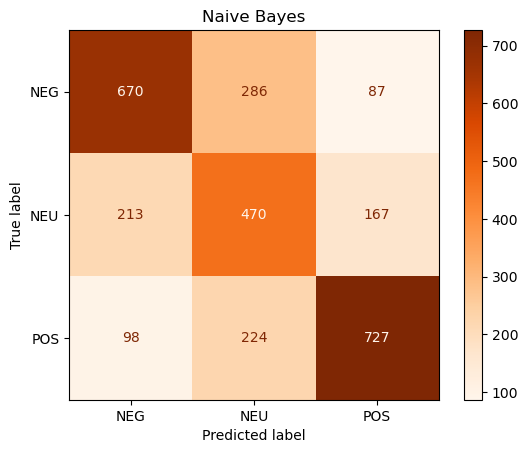

{'accuracy': 0.6346023113528212, 'recall': 0.6345496404474124, 'precision': 0.6294533081209016, 'f1_score': 0.6306575652632133}


In [8]:
from src.trainers.utils import evaluate_model
from src.trainers.utils import load_model

# Evaluar modelo con datos de prueba
pipeline = load_model(NB_PIPELINE_PATH)
metrics = evaluate_model(pipeline, dataset_test, title="Naive Bayes")
print(metrics)

## Test

In [9]:
from constants.constants_nlp import INDEX_TO_POLARITY
from src.preprocesamiento.clean import clean_text
from src.preprocesamiento.nlp_spacy import preprocesamiento

textos_test = ["Hola! cómo estás???😀","el dia de hoy estoy feliz y contento", "estoy muy triste", "Me encuentro estudiando para un exámen", "A veces me encuentro triste, pero la mayoria del tiempo estoy muy feliz"]
textos_test = list(map(lambda x: clean_text(x), textos_test))
textos_test = preprocesamiento(textos_test)

preds = pipeline.predict(textos_test)
for input, pred in zip(textos_test,preds):
    print(f"{input}: {INDEX_TO_POLARITY[pred]}")

Modelo cargado: es_core_news_sm
Aplicando stemming...
Total de documentos preprocesados: 5
hol estar: NEU
feliz content: POS
trist: NEG
encontr estudi exam: NEU
encontr trist mayor tiemp feliz: NEG
